# Classification Example

### Importing and Reading data

In [1]:
!pip install scikit-learn==1.2.2

In [2]:
!pip install imblearn

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn import metrics 
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

In [2]:
# Reading the data (Target Variable -> Exited)
churn_data = pd.read_csv('Customer_Churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dropping uneccesary columns
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Basic EDA and Statistics

In [4]:
# Print the shape of the data
churn_data.shape

(10000, 11)

In [5]:
# Checking for any NULL / NaN values
churn_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Information about the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Checking the data
churn_data.describe().round(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.248,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [8]:
# Checking the counts of the categorical variables
cat_cols = ['Geography', 'Gender', 'Exited']

for i in cat_cols:
    print('Value Counts of ' + str(i) + ':')
    print(churn_data[i].value_counts())
    print('-' * 40)

Value Counts of Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----------------------------------------
Value Counts of Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----------------------------------------
Value Counts of Exited:
Exited
0    7963
1    2037
Name: count, dtype: int64
----------------------------------------


In [9]:
# Checking the counts of the categorical variables
cat_cols = ['Geography', 'Gender', 'Exited']

for i in cat_cols:
    print('Value Counts of ' + str(i) + ':')
    print(churn_data[i].value_counts(normalize = True))
    print('-' * 40)

Value Counts of Geography:
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64
----------------------------------------
Value Counts of Gender:
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64
----------------------------------------
Value Counts of Exited:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
----------------------------------------


<Axes: xlabel='Balance', ylabel='Density'>

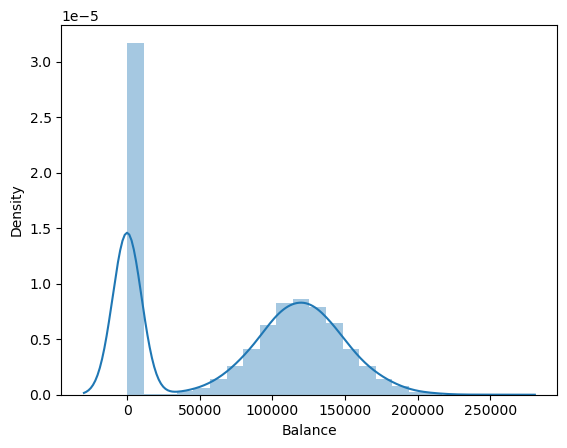

In [10]:
# Plotting graphs
sns.distplot(churn_data['Balance'], kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

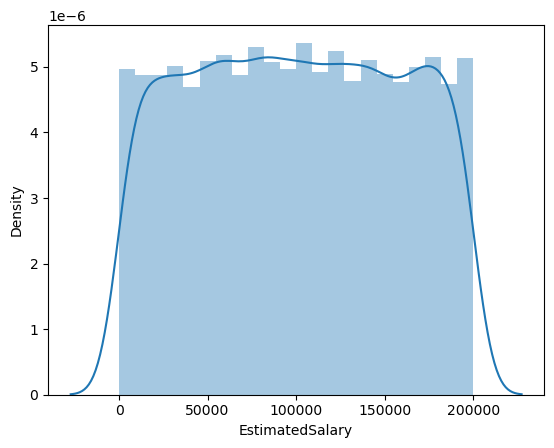

In [11]:
sns.distplot(churn_data['EstimatedSalary'], kde=True)

### Data Preprocessing

In [12]:
# Apply One Hot Encoding using get_dummies()
churn_data_encoded = pd.get_dummies(churn_data, drop_first=True)
churn_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
# Numerical Columns for Data Normalization / Transformation
cnames = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sc = StandardScaler()

# fit_transform used for fitting and transforming using the standardScalar
for col in cnames:
    churn_data_encoded[col] = sc.fit_transform(churn_data_encoded[col].values.reshape(-1,1))

churn_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


In [14]:
# Splitting the target and independent variables
X = churn_data_encoded.drop('Exited', axis = 1)
Y = churn_data_encoded['Exited']

#### Handling class imbalance with the help of SMOTE

Class imbalance occurs when one class in the dataset has significantly fewer instances than the other class or classes. This can lead to biased models that perform poorly on the minority class. To handle this, Synthetic Minority Over-sampling Technique (SMOTE) comes into picture.
- **SMOTE** specifically focuses on the minority class and aims to balance the class distribution by generating synthetic examples. 

- The basic idea behind SMOTE is to create synthetic samples in feature space by interpolating between existing minority class instances.

In [15]:
churn_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

You can observe that the dataset has **~8000 class '0' and ~ 2000 class '1'** values. This can hinder in the performance of the model. 

In [16]:
# Apply SMOTE
smot = SMOTE(random_state = 0)
smot_x, smot_y = smot.fit_resample(X, Y)
smot_x = pd.DataFrame(smot_x, columns = X.columns)
smot_y = pd.DataFrame(smot_y, columns = ['Exited'])

In [17]:
# Checking the counts
smot_y.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

### Model Building

In [18]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(smot_x, smot_y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)

(12740, 11)
(3186, 11)


#### Building a Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()                                                 
regressor = regressor.fit(x_train, y_train)

In [20]:
# Print the coefficients and intercepts
print(regressor.coef_, regressor.intercept_)

[[-0.0485398   0.86986276 -0.01277565  0.03763649 -0.08733417 -0.21180099
  -1.20131342  0.01006425  1.21479791  0.34023257 -0.29304311]] [0.15389562]


In [21]:
# Predicting the values using the predict()
y_pred = regressor.predict(x_test)

#### Analyzing the Performance

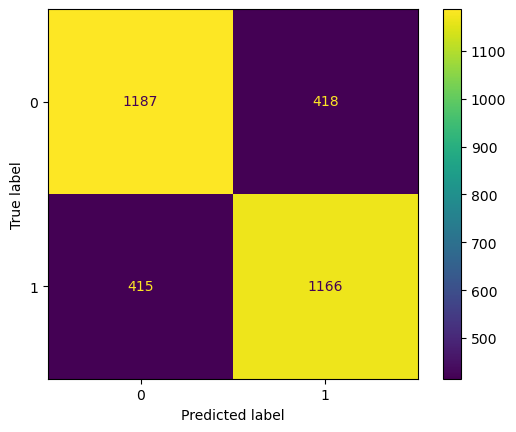

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = regressor.classes_)

disp.plot()
plt.show()

In [31]:
# Calculate Accuracy, Precision, Recall and F1 Score

y_train_pred = regressor.predict(x_train)
print('Training accuracy:', accuracy_score(y_train, y_train_pred).round(3))
print('Testing accuracy:', accuracy_score(y_test, y_pred).round(3))
print('Precision Score:', precision_score(y_test, y_pred).round(3))
print('Recall Score:', recall_score(y_test, y_pred).round(3))

pre = precision_score(y_test, y_pred).round(3)
rec = recall_score(y_test, y_pred).round(3)

f1_score = (2 * pre * rec)/(pre + rec)
print('F1-Score:', f1_score.round(3))

Training accuracy: 0.721
Testing accuracy: 0.739
Precision Score: 0.736
Recall Score: 0.738
F1-Score: 0.737


In [24]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1605
           1       0.74      0.74      0.74      1581

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



In [25]:
# Generate AUC-ROC curve
probs = regressor.predict_proba(x_test)
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('AUC Score:', roc_auc.round(3))

AUC Score: 0.803


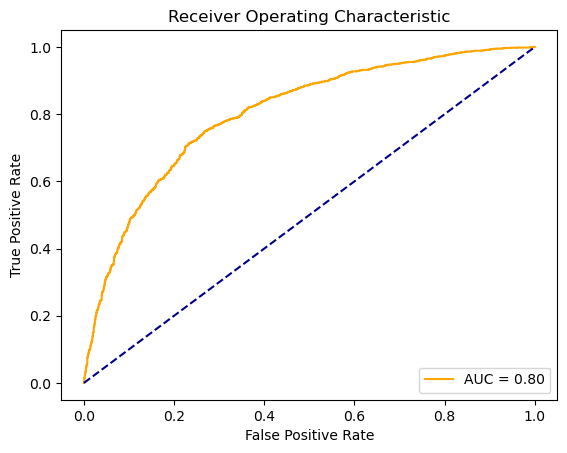

In [26]:
# Generate the curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()